## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Прочитаем наш файл с исходными данными:

In [376]:
data = pd.read_csv("/Users/eduardgavrilov/Downloads/train.csv")
print('Train data shape: {}'.format(data.shape))
data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [377]:
# ваш код здесь

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')


In [378]:
print(f"{data['pickup_datetime'].dt.date.min(), data['pickup_datetime'].dt.date.max()} - временные рамки")

(datetime.date(2016, 1, 1), datetime.date(2016, 6, 30)) - временные рамки


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [379]:
# ваш код здесь

data.info()
data.isnull().sum()

# пропуски отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [380]:
# ваш код здесь
print(f"{data['vendor_id'].nunique()} - уникальных таксопарков присутствует в данных")
print(f"{data['passenger_count'].max()} - максимальное количество пассажиров")
print(f"{round(data['trip_duration'].mean())} - средняя длительность поездки и {round(data['trip_duration'].median())} - медианная длительность поездки")
print(f"{round(data['trip_duration'].min())} - минимальная длительность поездки и {round(data['trip_duration'].max())} - максимальная длительность поездки")


2 - уникальных таксопарков присутствует в данных
9 - максимальное количество пассажиров
959 - средняя длительность поездки и 662 - медианная длительность поездки
1 - минимальная длительность поездки и 3526282 - максимальная длительность поездки


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [381]:
# ваш код здесь

def add_datetime_features(df):
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.weekday
    return df

df_new = add_datetime_features(df=data)
print(f"{df_new[df_new['pickup_day_of_week'] == 5].shape[0]} - поездок было совершено в субботу")
print(f"{round(df_new['pickup_date'].value_counts().mean())} - в среднем совершается в день")



220868 - поездок было совершено в субботу
8015 - в среднем совершается в день


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [382]:
holiday_data = pd.read_csv("/Users/eduardgavrilov/Downloads/holiday_data.csv", sep=';')
# ваш код здесь

holiday_data['date'] = pd.to_datetime(holiday_data['date'], format='%Y-%m-%d')

# Проверка и преобразование типов данных в df_new
df_new['pickup_date'] = pd.to_datetime(df_new['pickup_date'], format='%Y-%m-%d')

# Функция добавления признака праздничного дня
import pandas as pd

def add_holiday_features(df_new, holiday_data):
    # Убедимся, что дата в holiday_data в правильном формате и преобразуем, если необходимо
    try:
        # Преобразование даты в holiday_data
        holiday_data['date'] = pd.to_datetime(holiday_data['date'], format='%Y-%m-%d')
    except ValueError:
        # Если формат другой, обрабатываем исключение
        print("Дата в holiday_data уже в нужном формате или имеет другой формат")

    # Проверка и преобразование типов данных в df_new
    df_new['pickup_date'] = pd.to_datetime(df_new['pickup_date'], format='%Y-%m-%d')
    # Перевод дат к типу date, чтобы игнорировать время
    df_new['pickup_date'] = df_new['pickup_date'].dt.date
    holiday_data['date'] = holiday_data['date'].dt.date

    # Добавление признака праздничного дня
    df_new['pickup_holiday'] = df_new['pickup_date'].isin(holiday_data['date']).astype(int)

    return df_new


df_new = add_holiday_features(df_new.copy(), holiday_data)
print(f"{round(df_new.groupby('pickup_holiday')['trip_duration'].median()[1])} - медианная длительность поездки на такси в праздничные дни")

585 - медианная длительность поездки на такси в праздничные дни


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [383]:
osrm_data = pd.read_csv("/Users/eduardgavrilov/Downloads/osrm_data_train.csv")
# ваш код здесь
# osrm_data.head(5)

In [384]:
def add_osrm_features(df_new, osrm_data):
    df_new = df_new.merge(osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']], on='id', how='left')
    return df_new

df_new = add_osrm_features(df_new.copy(), osrm_data)

print(f"{round(df_new['trip_duration'].median() - df_new['total_travel_time'].median())} - разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM")
print(f"{df_new.isna().any(axis=1).sum()} - пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц")

372 - разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM
1 - пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц


In [385]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [386]:
# ваш код здесь

def add_geographical_features(df):
    # Добавляем столбцы с расстоянием и направлением, используя применение функций к каждой строке
    df['haversine_distance'] = df.apply(lambda row: get_haversine_distance(row['pickup_latitude'], row['pickup_longitude'],
                                                                           row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
    df['direction'] = df.apply(lambda row: get_angle_direction(row['pickup_latitude'], row['pickup_longitude'],
                                                               row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
    return df

df_new_df = add_geographical_features(df_new.copy())



print(f"{round(df_new_df.haversine_distance.median(), 2)} - медианное расстояние Хаверсина поездок (в киллометрах)")

2.09 - медианное расстояние Хаверсина поездок (в киллометрах)


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [387]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((df_new_df[['pickup_latitude', 'pickup_longitude']],
                    df_new_df[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь

def add_cluster_features(df, cluster_model):
    # Создаем массив координат из pickup и dropoff точек
    coords = np.hstack((df[['pickup_latitude', 'pickup_longitude']].values,
                        df[['dropoff_latitude', 'dropoff_longitude']].values))
    
    # Предсказываем кластеры для каждой поездки
    df['geo_cluster'] = cluster_model.predict(coords)
    
    return df

# Подготовка данных и обучение модели кластеризации (ваш код для обучения модели)
# df_new_df - предполагаем, что это ваш DataFrame с данными о поездках
coords = np.hstack((df_new_df[['pickup_latitude', 'pickup_longitude']],
                    df_new_df[['dropoff_latitude', 'dropoff_longitude']]))
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# Применяем функцию add_cluster_features
df_new_df = add_cluster_features(df_new_df, kmeans)

# Считаем количество поездок в каждом кластере
cluster_counts = df_new_df['geo_cluster'].value_counts()

# Находим наименьший кластер
min_cluster_size = cluster_counts.min()

print(f"Количество поездок в наименьшем кластере:", {min_cluster_size})




/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество поездок в наименьшем кластере: {2}


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [388]:
weather_data = pd.read_csv('/Users/eduardgavrilov/Downloads/weather_data.csv')

# ваш код здесь

def add_weather_features(trip_data, weather_data):
    # Преобразование времени в таблице поездок в дату и час для слияния
    trip_data['pickup_datetime'] = pd.to_datetime(trip_data['pickup_datetime'])
    trip_data['date'] = trip_data['pickup_datetime'].dt.date
    trip_data['hour'] = trip_data['pickup_datetime'].dt.hour
    
    # Преобразование столбца времени в погодных данных в datetime и извлечение даты и часа
    weather_data['time'] = pd.to_datetime(weather_data['time'])
    weather_data['date'] = weather_data['time'].dt.date
    weather_data['hour'] = weather_data['time'].dt.hour
    
    # Слияние данных
    merged_data = pd.merge(trip_data, weather_data[['date', 'hour', 'temperature', 'visibility', 
                                                    'wind speed', 'precip', 'events']],
                           on=['date', 'hour'], how='left')
    
    return merged_data

# Пример использования, предполагая, что trip_data и weather_data уже загружены
trip_data = add_weather_features(df_new_df, weather_data)

# Подсчет количества поездок в снежную погоду
snow_trips_count = trip_data[trip_data['events'].str.contains('Snow', na=False)].shape[0]
# Подсчет процентного соотношения пропусков в погодных данных
total_rows = trip_data.shape[0]
missing_weather_data = trip_data[trip_data['temperature'].isna()].shape[0]
missing_percentage = round((missing_weather_data / total_rows) * 100, 2)
print(f"{snow_trips_count} - количества поездок в снежную погоду")
print(f"{missing_percentage} - процентного соотношения пропусков в погодных данных")


13126 - количества поездок в снежную погоду
0.82 - процентного соотношения пропусков в погодных данных


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [389]:
# ваш код здесь

def fill_null_weather_data(df):
    # Список погодных столбцов для заполнения медианой
    weather_columns = ['temperature', 'visibility', 'wind speed', 'precip']
    
    # Вычисляем медианы для каждой даты и каждого столбца
    median_per_date = df.groupby(df['pickup_datetime'].dt.date)[weather_columns].transform('median')
    
    # Заполняем пропуски в погодных данных медианой по дате начала поездки
    df[weather_columns] = df[weather_columns].fillna(median_per_date)
    
    # Заполняем пропуски в событиях погоды строкой 'None'
    df['events'] = df['events'].fillna('None')
    
    # Список столбцов маршрута для заполнения медианой
    route_columns = ['total_distance', 'total_travel_time', 'number_of_steps']
    
    # Заполняем пропуски в данных о маршруте медианами этих столбцов
    df[route_columns] = df[route_columns].fillna(df[route_columns].median())

    return df

# Пример использования функции:
trip_data = fill_null_weather_data(trip_data)

print(f"{round(trip_data['temperature'].median(), 1)} - медиана в столбце temperature после заполнения пропусков")

11.1 - медиана в столбце temperature после заполнения пропусков


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


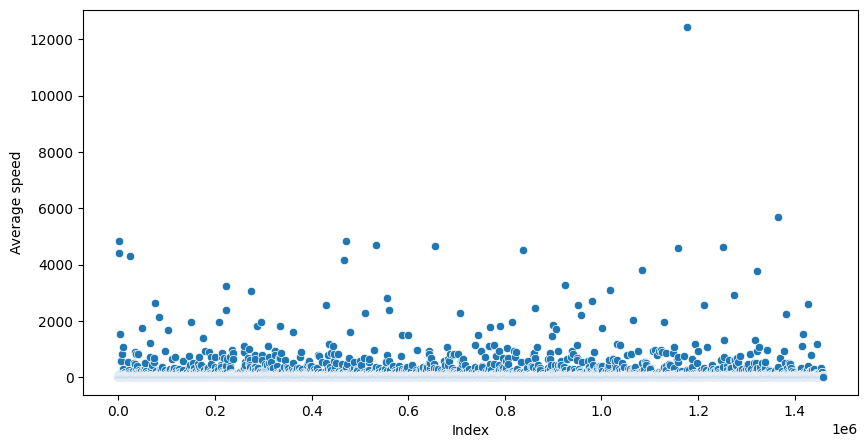

In [390]:
avg_speed = trip_data['total_distance'] / trip_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [391]:
# ваш код здесь
trip_data['avg_speed'] = trip_data['total_distance'] / trip_data['trip_duration'] * 3.6

long_trip_indices = trip_data[trip_data['trip_duration'] > 86400].index
# Удаляем эти поездки из DataFrame
trip_data = trip_data.drop(long_trip_indices)
# удаляем поездки из DataFrame скорость которых превышает 300 км
bad_speed = trip_data[trip_data['avg_speed'] > 300].index
trip_data = trip_data.drop(bad_speed)

print(f"{len(long_trip_indices)} - выбросов по признаку длительности поездки")
print(f"{len(bad_speed)} - выбросов по признаку скорости")


4 - выбросов по признаку длительности поездки
407 - выбросов по признаку скорости


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [392]:
taxi_data = trip_data.copy()

In [393]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

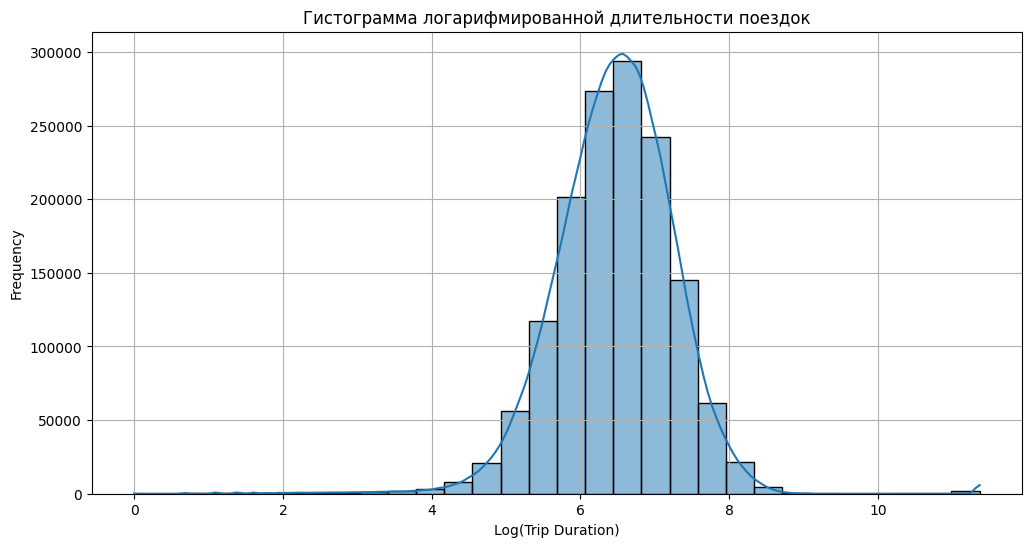

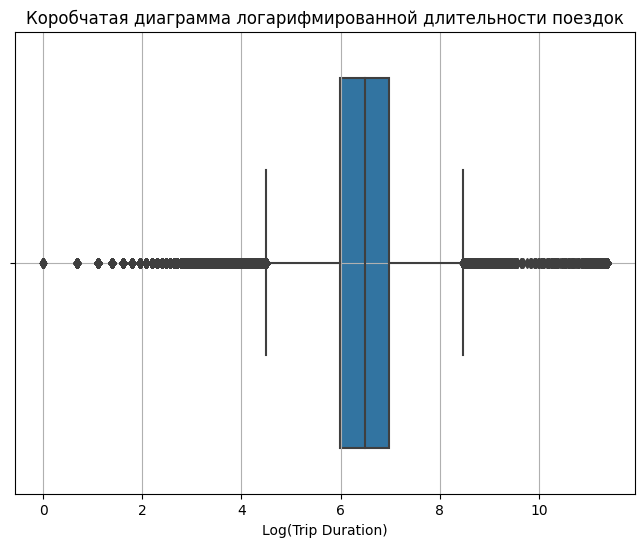

In [394]:
# ваш код здесь


def plot_trip_duration(df):
    # Преобразование длительности поездок в логарифмический масштаб
    df['trip_duration_log'] = np.log(df['trip_duration'])

    # Гистограмма
    plt.figure(figsize=(12, 6))
    sns.histplot(df['trip_duration_log'], bins=30, kde=True)
    plt.title('Гистограмма логарифмированной длительности поездок')
    plt.xlabel('Log(Trip Duration)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Коробчатая диаграмма
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['trip_duration_log'])
    plt.title('Коробчатая диаграмма логарифмированной длительности поездок')
    plt.xlabel('Log(Trip Duration)')
    plt.grid(True)
    plt.show()

# Пример использования функции:
plot_trip_duration(taxi_data)


In [395]:
from scipy.stats import normaltest

def check_normality(df):
    # Преобразование длительности поездок в логарифмический масштаб, если ещё не преобразовано
    if 'trip_duration_log' not in df.columns:
        df['trip_duration_log'] = np.log(df['trip_duration'])

    # Тест на нормальность
    statistic, p_value = normaltest(df['trip_duration_log'])
    print("Статистика теста: {:.2f}, p-значение: {:.2f}".format(statistic, p_value))

    # Проверка гипотезы
    if p_value < 0.05:
        print("Распределение не является нормальным (отклоняем нулевую гипотезу)")
    else:
        print("Распределение может быть нормальным (не отклоняем нулевую гипотезу)")

# Пример использования функции:
check_normality(taxi_data)


Статистика теста: 152052.09, p-значение: 0.00
Распределение не является нормальным (отклоняем нулевую гипотезу)


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


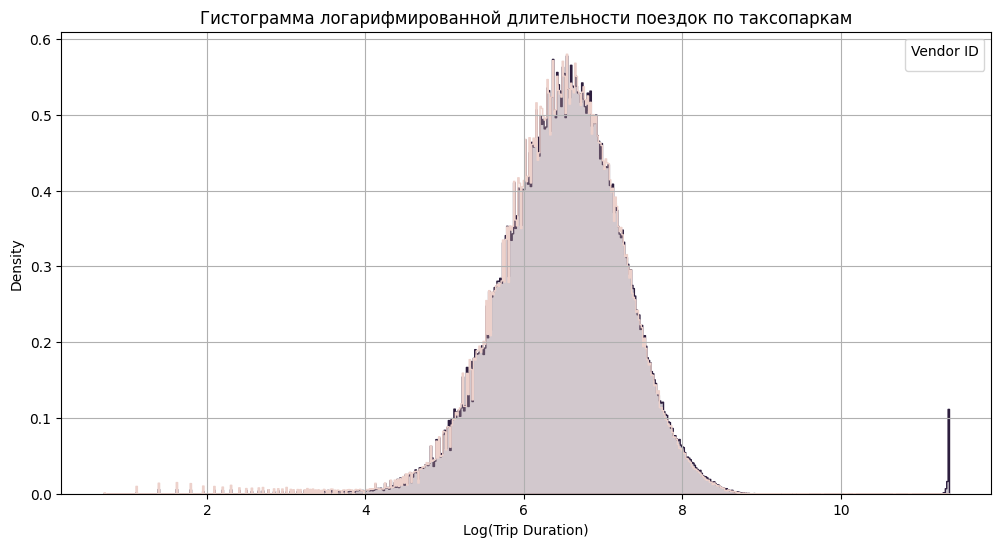

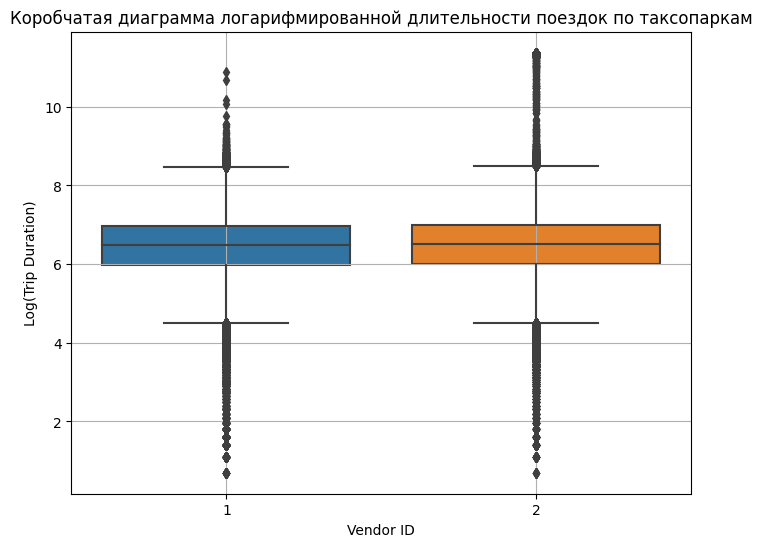

In [396]:
# ваш код здесь

def plot_trip_duration_by_vendor(df):
    # Проверяем наличие нужного столбца или создаем его
    df['trip_duration_log'] = np.log(df['trip_duration'] + 1)  # Добавляем 1, чтобы избежать log(0)

    # Создание гистограммы
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='trip_duration_log', hue='vendor_id', element='step', stat='density', common_norm=False)
    plt.title('Гистограмма логарифмированной длительности поездок по таксопаркам')
    plt.xlabel('Log(Trip Duration)')
    plt.ylabel('Density')
    plt.legend(title='Vendor ID')
    plt.grid(True)
    plt.show()

    # Создание коробчатой диаграммы
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='vendor_id', y='trip_duration_log', data=df)
    plt.title('Коробчатая диаграмма логарифмированной длительности поездок по таксопаркам')
    plt.xlabel('Vendor ID')
    plt.ylabel('Log(Trip Duration)')
    plt.grid(True)
    plt.show()

# Пример использования функции:
plot_trip_duration_by_vendor(taxi_data)


### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


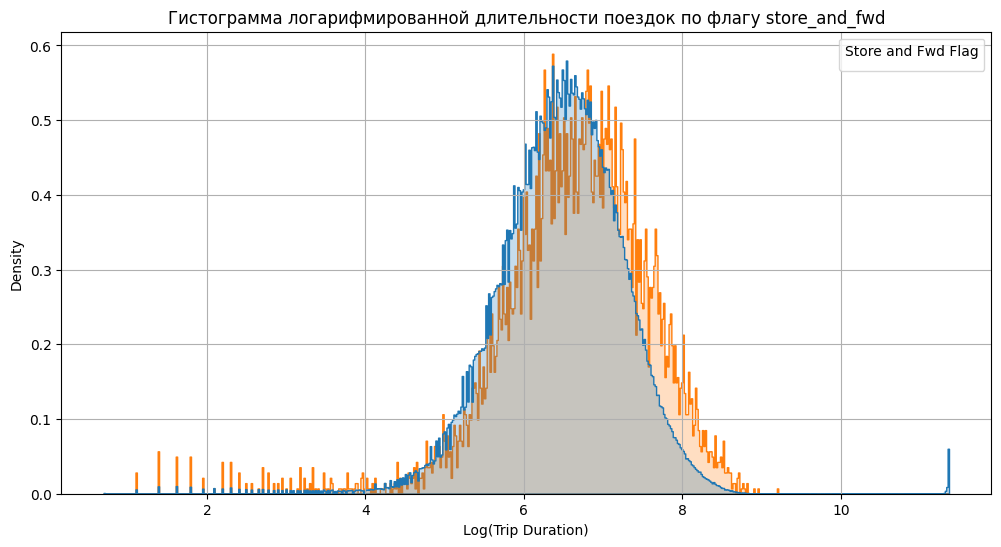

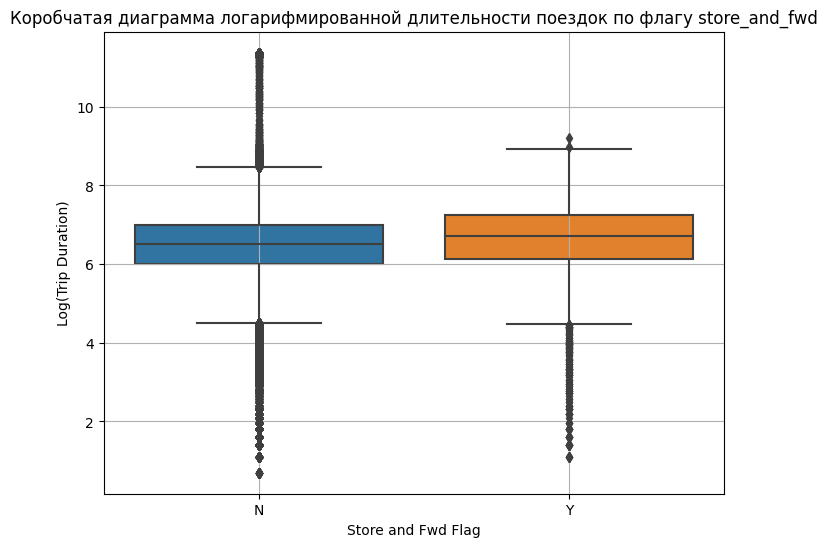

In [397]:
# ваш код здесь


def plot_trip_duration_by_store_flag(df):
    # Проверяем наличие нужного столбца или создаем его
    df['trip_duration_log'] = np.log(df['trip_duration'] + 1)  # Добавляем 1, чтобы избежать log(0)

    # Создание гистограммы
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='trip_duration_log', hue='store_and_fwd_flag', element='step', stat='density', common_norm=False)
    plt.title('Гистограмма логарифмированной длительности поездок по флагу store_and_fwd')
    plt.xlabel('Log(Trip Duration)')
    plt.ylabel('Density')
    plt.legend(title='Store and Fwd Flag')
    plt.grid(True)
    plt.show()

    # Создание коробчатой диаграммы
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='store_and_fwd_flag', y='trip_duration_log', data=df)
    plt.title('Коробчатая диаграмма логарифмированной длительности поездок по флагу store_and_fwd')
    plt.xlabel('Store and Fwd Flag')
    plt.ylabel('Log(Trip Duration)')
    plt.grid(True)
    plt.show()

# Пример использования функции:
plot_trip_duration_by_store_flag(taxi_data)


### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

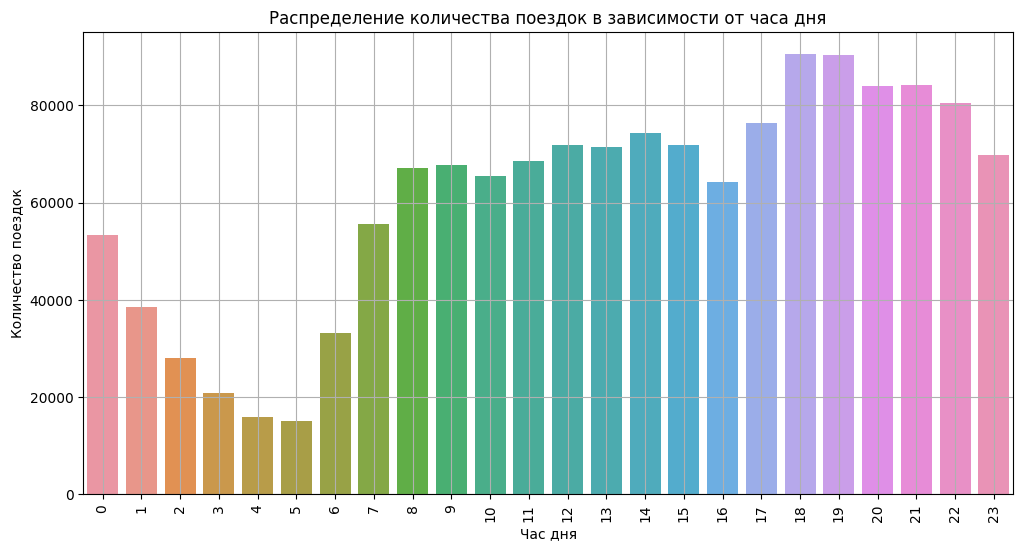

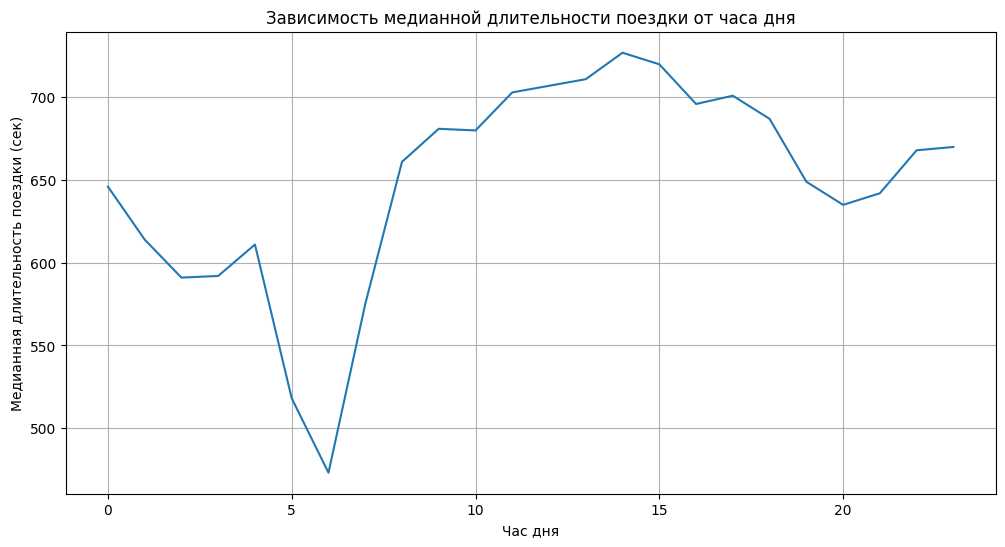

In [398]:
# ваш код здесь

def plot_trip_count_by_hour(df):
    # Подсчёт количества поездок в зависимости от часа
    trip_counts_by_hour = df['hour'].value_counts().sort_index()
    
    # Построение графика
    plt.figure(figsize=(12, 6))
    sns.barplot(x=trip_counts_by_hour.index, y=trip_counts_by_hour.values)
    plt.title('Распределение количества поездок в зависимости от часа дня')
    plt.xlabel('Час дня')
    plt.ylabel('Количество поездок')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

plot_trip_count_by_hour(taxi_data)

def plot_median_trip_duration_by_hour(df):
    # Вычисление медианной длительности поездок в зависимости от часа
    median_duration_by_hour = df.groupby('hour')['trip_duration'].median()

    # Построение графика
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=median_duration_by_hour.index, y=median_duration_by_hour.values)
    plt.title('Зависимость медианной длительности поездки от часа дня')
    plt.xlabel('Час дня')
    plt.ylabel('Медианная длительность поездки (сек)')
    plt.grid(True)
    plt.show()

plot_median_trip_duration_by_hour(taxi_data)



### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


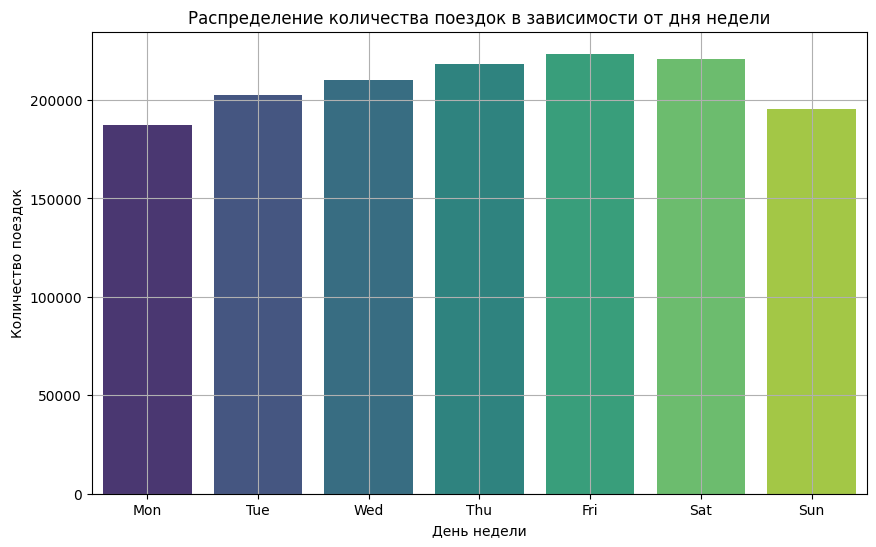

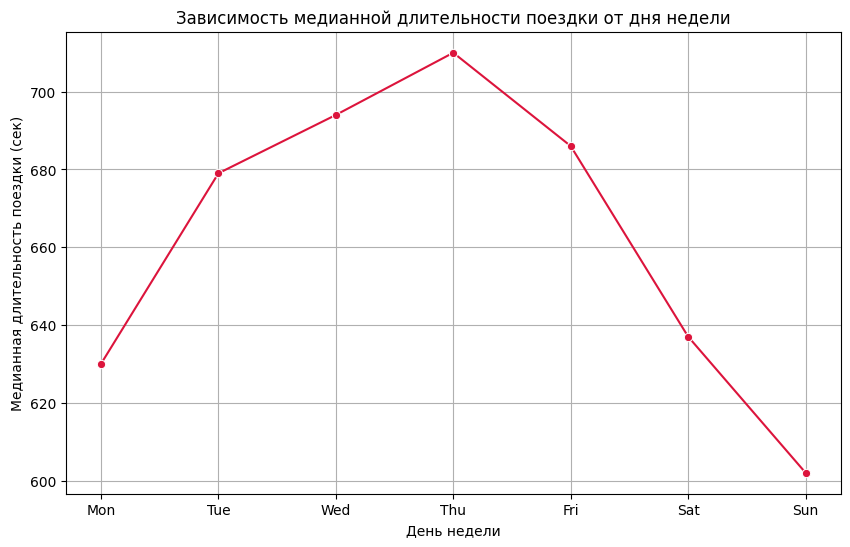

In [399]:
# ваш код здесь

def plot_trip_count_by_day_of_week(df):
    # Подсчёт количества поездок в зависимости от дня недели
    trip_counts_by_day = df['pickup_day_of_week'].value_counts().sort_index()
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.barplot(x=trip_counts_by_day.index, y=trip_counts_by_day.values, palette='viridis')
    plt.title('Распределение количества поездок в зависимости от дня недели')
    plt.xlabel('День недели')
    plt.ylabel('Количество поездок')
    plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.grid(True)
    plt.show()

plot_trip_count_by_day_of_week(taxi_data)


def plot_median_trip_duration_by_day_of_week(df):
    # Вычисление медианной длительности поездок в зависимости от дня недели
    median_duration_by_day = df.groupby('pickup_day_of_week')['trip_duration'].median()

    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=median_duration_by_day.index, y=median_duration_by_day.values, marker='o', color='crimson')
    plt.title('Зависимость медианной длительности поездки от дня недели')
    plt.xlabel('День недели')
    plt.ylabel('Медианная длительность поездки (сек)')
    plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.grid(True)
    plt.show()

plot_median_trip_duration_by_day_of_week(taxi_data)


### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

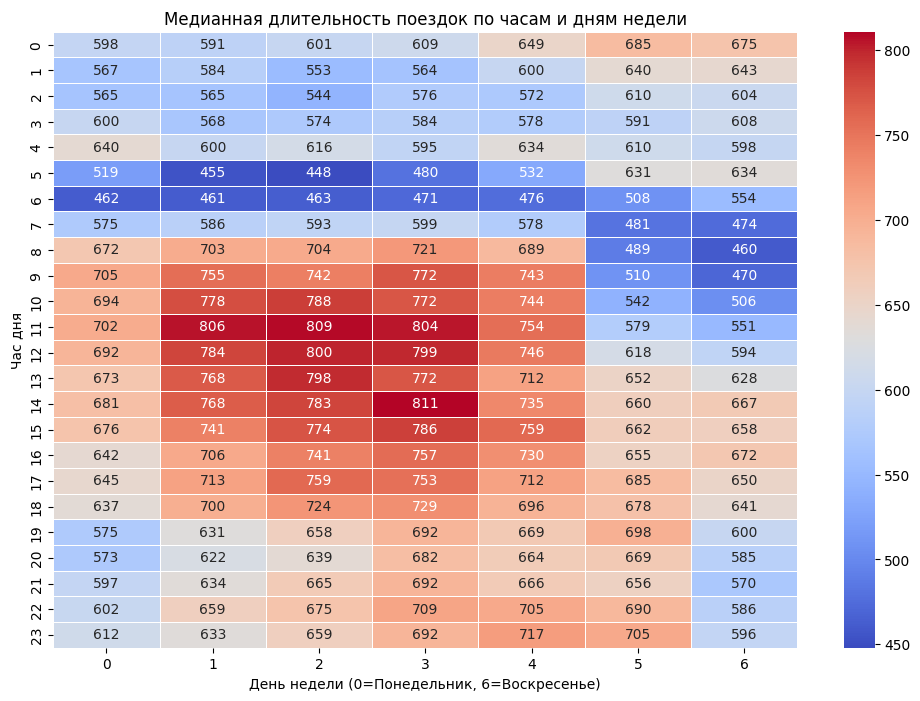

In [400]:
# ваш код здесь

pivot_table = taxi_data.pivot_table(index='pickup_hour', columns='pickup_day_of_week', values='trip_duration', aggfunc='median')

# Визуализация с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Медианная длительность поездок по часам и дням недели')
plt.xlabel('День недели (0=Понедельник, 6=Воскресенье)')
plt.ylabel('Час дня')
plt.show()



### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


/Users/eduardgavrilov/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


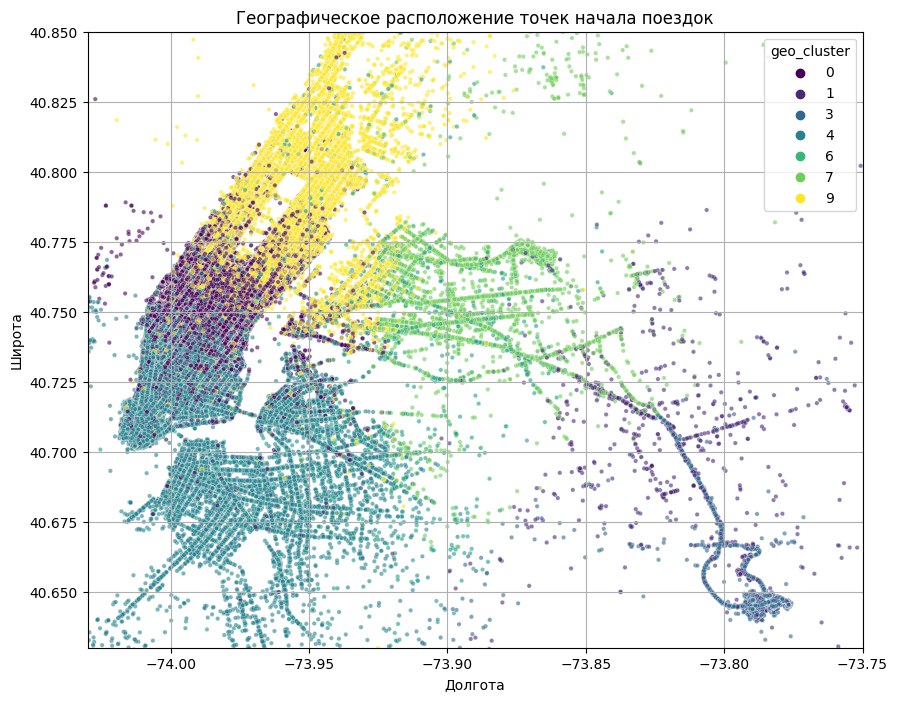

/Users/eduardgavrilov/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


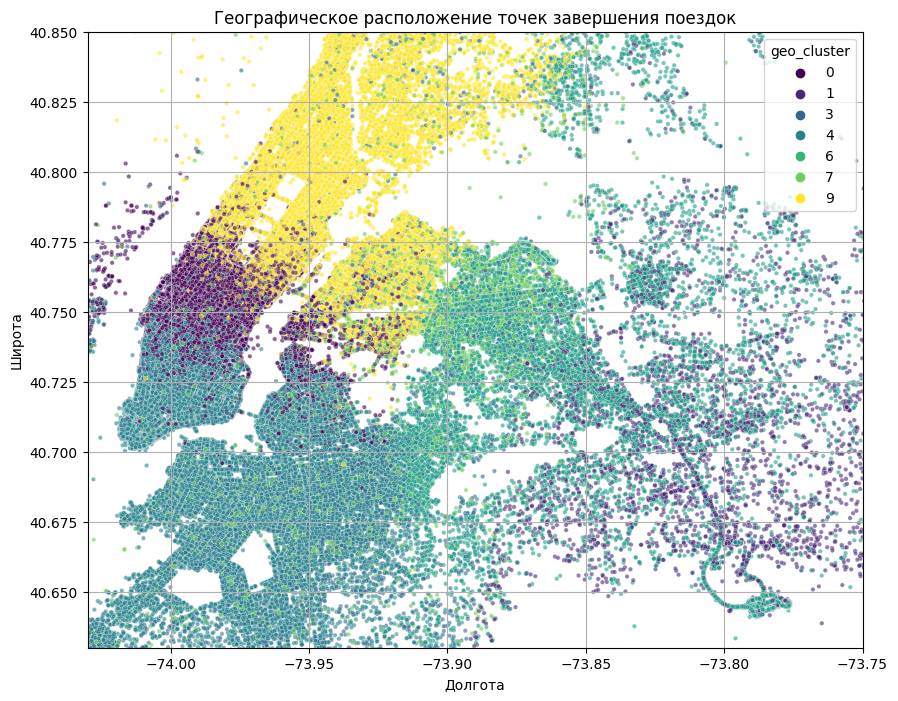

In [401]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# ваш код здесь

def plot_pickup_locations(df, city_long_border=city_long_border, city_lat_border=city_lat_border):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='geo_cluster', palette='viridis', data=df, s=10,
                    alpha=0.6)
    plt.xlim(city_long_border)
    plt.ylim(city_lat_border)
    plt.title('Географическое расположение точек начала поездок')
    plt.xlabel('Долгота')
    plt.ylabel('Широта')
    plt.grid(True)
    plt.show()

plot_pickup_locations(taxi_data)

def plot_dropoff_locations(df, city_long_border=city_long_border, city_lat_border=city_lat_border):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', hue='geo_cluster', palette='viridis', data=df, s=10,
                    alpha=0.6)
    plt.xlim(city_long_border)
    plt.ylim(city_lat_border)
    plt.title('Географическое расположение точек завершения поездок')
    plt.xlabel('Долгота')
    plt.ylabel('Широта')
    plt.grid(True)
    plt.show()

plot_dropoff_locations(taxi_data)



## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [402]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 30)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip',
       'events', 'avg_speed', 'trip_duration_log'],
      dtype='object')


УДАЛИТЬ DATE, HOUR, AVG_SPEED!!!

Для удобства работы сделаем копию исходной таблицы с поездками:

In [403]:
taxi_data.drop(['date', 'hour', 'avg_speed'], axis=1, inplace=True)

In [404]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности? Признак ID

б) Утечка данных (data leak) - это ситуация, в которой данные используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных? dropoff_datetime - афиксированное время остановки счётчика. Начиная поездку, мы никак не можем точно знать, когда она закончится, ведь мы как раз и пытаемся предсказать время окончания поездки.
никакие будущие данные не используются для создания признаков, которые бы предсказывали прошлые или текущие события.

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [405]:
# ваш код здесь

train_data.drop(['id', 'dropoff_datetime'], axis=1, inplace=True)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [406]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [407]:
# ваш код здесь
# Заменяем значения в vendor_id
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
# Заменяем значения в store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

print(f"{round(train_data['vendor_id'].mean(), 2)} - среднее по закодированному столбцу vendor_id")
print(f"{round(train_data['store_and_fwd_flag'].mean(), 3)} - среднее по закодированному столбцу store_and_fwd_flag")


0.53 - среднее по закодированному столбцу vendor_id
0.006 - среднее по закодированному столбцу store_and_fwd_flag


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [408]:
# ваш код здесь

one_hot_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Выбираем колонки для кодирования
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# Применяем OneHotEncoder к выбранным колонкам
data_onehot = one_hot_encoder.fit_transform(train_data[columns_to_change])

# Создаем DataFrame для закодированных данных
data_onehot = pd.DataFrame(data_onehot, columns=one_hot_encoder.get_feature_names_out(columns_to_change))

print(f"{data_onehot.shape[1]} - бинарных столбцов получилось сгенерировать с помощью однократного кодирования")


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


18 - бинарных столбцов получилось сгенерировать с помощью однократного кодирования


Добавим полученную таблицу с закодированными признаками:

In [409]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [410]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [411]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [412]:
# Создаем экземпляр SelectKBest
selector = SelectKBest(score_func=f_regression, k=25)

# Обучаем selector на обучающем наборе
X_train_selected = selector.fit_transform(X_train, y_train_log)

X_valid_selected = selector.transform(X_valid)

# Получаем маску выбранных признаков
features_selected_mask = selector.get_support()

# Применяем маску к столбцам обучающего набора данных
selected_features = X_train.columns[features_selected_mask]

print("Выбранные признаки:\n", selected_features)


Выбранные признаки:
 Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_hour', 'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'temperature',
       'pickup_day_of_week_1', 'pickup_day_of_week_2', 'pickup_day_of_week_3',
       'pickup_day_of_week_4', 'pickup_day_of_week_5', 'pickup_day_of_week_6',
       'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_5', 'geo_cluster_7',
       'geo_cluster_9'],
      dtype='object')


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [413]:
# Инициализация MinMaxScaler
scaler = MinMaxScaler()

# Обучение scaler на выбранных признаках обучающего набора
scaler.fit(X_train[selected_features])

# Нормализация выбранных признаков в обучающем наборе
X_train_scaled = scaler.transform(X_train[selected_features])

# Нормализация выбранных признаков в валидационном наборе
X_valid_scaled = scaler.transform(X_valid[selected_features])

# Вычисление среднего значения для первого столбца валидационной выборки
mean_first_predictor = np.mean(X_valid_scaled[:, 0])

# Вывод среднего значения, округленного до сотых
print(f"Среднее арифметическое первого предиктора в валидационной выборке: {mean_first_predictor:.2f}")


Среднее арифметическое первого предиктора в валидационной выборке: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [414]:
# Создание экземпляра модели линейной регрессии
model = LinearRegression()

# Обучение модели на нормализованных данных обучающей выборки с использованием логарифмической шкалы целевой переменной
model.fit(X_train_scaled, y_train_log)


# Предсказание на обучающей выборке
y_train_pred_log = model.predict(X_train_scaled)

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    """
    Вычисляет Root Mean Squared Logarithmic Error (RMSLE).
    """
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# Предсказание на обучающей и валидационной выборках
y_train_pred = np.exp(model.predict(X_train_scaled)) - 1
y_valid_pred = np.exp(model.predict(X_valid_scaled)) - 1

# Расчёт RMSLE для обучающей и валидационной выборок
rmsle_train = rmsle(np.exp(y_train_log) - 1, y_train_pred)
rmsle_valid = rmsle(np.exp(y_valid_log) - 1, y_valid_pred)

# Вывод результатов
print(f"RMSLE на тренировочной выборке: {rmsle_train:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid:.2f}")



RMSLE на тренировочной выборке: 0.54
RMSLE на валидационной выборке: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [415]:
#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_poly = poly.transform(X_train_scaled)
X_valid_poly = poly.transform(X_valid_scaled)

# строим модель полиномиальной регрессии
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly, y_train_log)
y_train_pred = lr_poly.predict(X_train_poly)
y_valid_pred = lr_poly.predict(X_valid_poly)

# Вычисление метрики RMSLE на тренировочной и валидационной выборках
rmsle_train_poly = np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))
rmsle_valid_poly = np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))

# Вывод метрики RMSLE, округленной до сотых
print(f"RMSLE на тренировочной выборке: {rmsle_train_poly:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid_poly:.2f}")

RMSLE на тренировочной выборке: 0.47
RMSLE на валидационной выборке: 0.70


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [416]:
# ваш код здесь

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Инициализация модели Ridge с коэффициентом регуляризации alpha=1
ridge_model = Ridge(alpha=1)

# Обучение модели на обучающем наборе данных
ridge_model.fit(X_train_poly, y_train_log)  # y_train_log - логарифмированная целевая переменная

# Предсказание на обучающей выборке
y_train_pred_log = ridge_model.predict(X_train_poly)
# Предсказание на валидационной выборке
y_valid_pred_log = ridge_model.predict(X_valid_poly)

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(np.exp(y_true) - 1), np.log1p(np.exp(y_pred) - 1)))

# Расчет RMSLE для обучающей и валидационной выборок
rmsle_train = rmsle(y_train_log, y_train_pred_log)
rmsle_valid = rmsle(y_valid_log, y_valid_pred_log)

# Вывод результатов
print(f"RMSLE на тренировочной выборке: {rmsle_train:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid:.2f}")


RMSLE на тренировочной выборке: 0.48
RMSLE на валидационной выборке: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [417]:
# ваш код здесь

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Создание экземпляра модели дерева решений
tree_model = DecisionTreeRegressor(random_state=42)

# Обучение модели на обучающей выборке
tree_model.fit(X_train_scaled, y_train_log)  # y_train_log - логарифм целевой переменной

# Предсказание на обучающей выборке
y_train_pred_log = tree_model.predict(X_train_scaled)
# Предсказание на валидационной выборке
y_valid_pred_log = tree_model.predict(X_valid_scaled)

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(np.exp(y_true) - 1), np.log1p(np.exp(y_pred) - 1)))

# Расчет RMSLE для обучающей и валидационной выборок
rmsle_train = rmsle(y_train_log, y_train_pred_log)
rmsle_valid = rmsle(y_valid_log, y_valid_pred_log)

# Вывод результатов
print(f"RMSLE на тренировочной выборке: {rmsle_train:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid:.2f}")


RMSLE на тренировочной выборке: 0.00
RMSLE на валидационной выборке: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


Оптимальная глубина дерева решений: 11


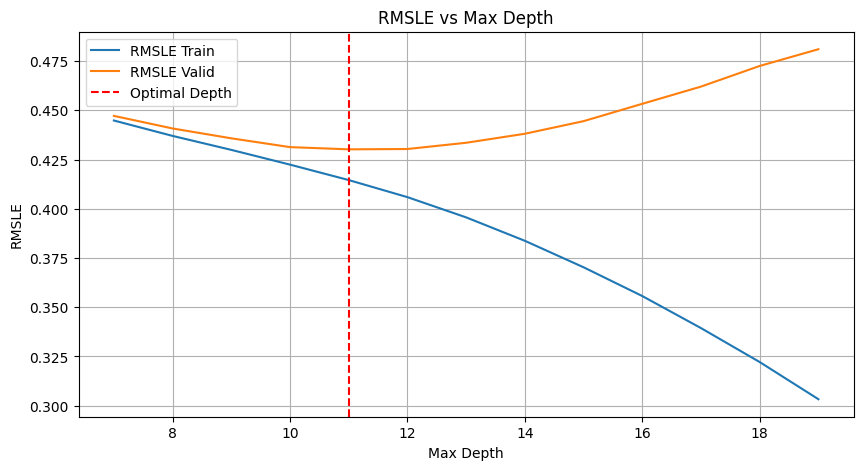

RMSLE на тренировочной выборке для оптимальной глубины: 0.41
RMSLE на валидационной выборке для оптимальной глубины: 0.43


In [418]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(np.exp(y_true) - 1), np.log1p(np.exp(y_pred) - 1)))

# Диапазон значений глубины дерева
max_depths = range(7, 20)

rmsle_train = []
rmsle_valid = []

# Перебор глубин дерева и сбор метрик
for max_depth in max_depths:
    tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_model.fit(X_train_scaled, y_train_log)
    y_train_pred = tree_model.predict(X_train_scaled)
    y_valid_pred = tree_model.predict(X_valid_scaled)
    rmsle_train.append(rmsle(y_train_log, y_train_pred))
    rmsle_valid.append(rmsle(y_valid_log, y_valid_pred))

# Определение оптимальной глубины
optimal_depth = max_depths[rmsle_valid.index(min(rmsle_valid))]
print(f"Оптимальная глубина дерева решений: {optimal_depth}")

# Визуализация изменений RMSLE
plt.figure(figsize=(10, 5))
plt.plot(max_depths, rmsle_train, label='RMSLE Train')
plt.plot(max_depths, rmsle_valid, label='RMSLE Valid')
plt.xlabel('Max Depth')
plt.ylabel('RMSLE')
plt.title('RMSLE vs Max Depth')
plt.axvline(x=optimal_depth, color='r', linestyle='--', label='Optimal Depth')
plt.legend()
plt.grid(True)
plt.show()

# Повторное обучение модели с оптимальной глубиной и вывод метрик RMSLE
optimal_tree_model = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
optimal_tree_model.fit(X_train_scaled, y_train_log)
y_train_pred_opt = optimal_tree_model.predict(X_train_scaled)
y_valid_pred_opt = optimal_tree_model.predict(X_valid_scaled)
rmsle_train_opt = rmsle(y_train_log, y_train_pred_opt)
rmsle_valid_opt = rmsle(y_valid_log, y_valid_pred_opt)
print(f"RMSLE на тренировочной выборке для оптимальной глубины: {rmsle_train_opt:.2f}")
print(f"RMSLE на валидационной выборке для оптимальной глубины: {rmsle_valid_opt:.2f}")


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [269]:
# ваш код здесь

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Создание экземпляра модели случайного леса с указанными гиперпараметрами
forest_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    verbose=True
)

# Обучение модели на нормализованных обучающих данных
forest_model.fit(X_train_scaled, y_train_log)  # y_train_log - логарифмированная целевая переменная

# Предсказание на обучающей и валидационной выборках
y_train_pred_log = forest_model.predict(X_train_scaled)
y_valid_pred_log = forest_model.predict(X_valid_scaled)

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(np.exp(y_true) - 1), np.log1p(np.exp(y_pred) - 1)))

# Расчет RMSLE для обучающей и валидационной выборок
rmsle_train = rmsle(y_train_log, y_train_pred_log)
rmsle_valid = rmsle(y_valid_log, y_valid_pred_log)

# Вывод результатов
print(f"RMSLE на тренировочной выборке: {rmsle_train:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid:.2f}")


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 17.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   17.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSLE на тренировочной выборке: 0.40
RMSLE на валидационной выборке: 0.41


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.4s finished


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [419]:
# ваш код здесь
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Создание экземпляра модели градиентного бустинга с указанными гиперпараметрами
gb_model = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)

# Обучение модели на нормализованных обучающих данных
gb_model.fit(X_train_scaled, y_train_log)  # y_train_log - логарифмированная целевая переменная

# Предсказание на обучающей выборке
y_train_pred_log = gb_model.predict(X_train_scaled)
# Предсказание на валидационной выборке
y_valid_pred_log = gb_model.predict(X_valid_scaled)

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(np.exp(y_true) - 1), np.log1p(np.exp(y_pred) - 1)))

# Расчет RMSLE для обучающей и валидационной выборок
rmsle_train = rmsle(y_train_log, y_train_pred_log)
rmsle_valid = rmsle(y_valid_log, y_valid_pred_log)

# Вывод результатов
print(f"RMSLE на тренировочной выборке: {rmsle_train:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_valid:.2f}")



RMSLE на тренировочной выборке: 0.37
RMSLE на валидационной выборке: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


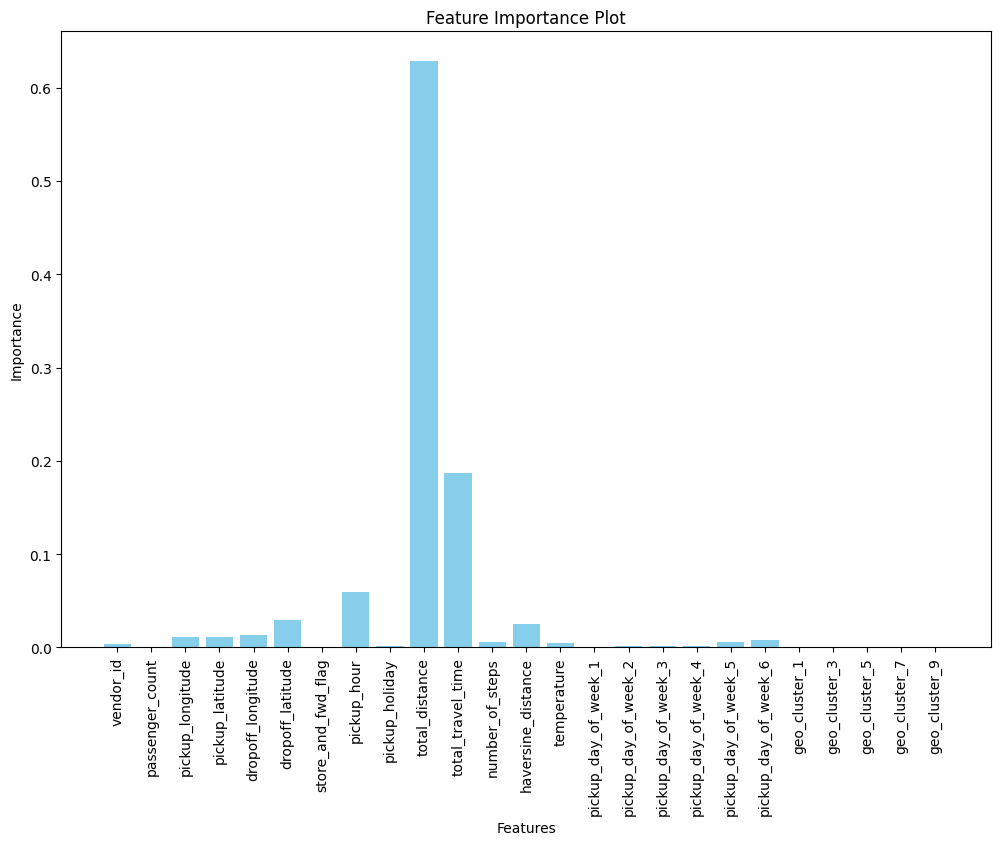

Топ-3 наиболее значимых признака:
total_distance: 0.6290
total_travel_time: 0.1871
pickup_hour: 0.0596


In [420]:
# Получение важности признаков от модели

feature_names = X_train[selected_features].columns

feature_importances = gb_model.feature_importances_

# Создание столбчатой диаграммы с именами признаков
plt.figure(figsize=(12, 8))
plt.bar(feature_names, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.xticks(rotation=90)
plt.show()

# Вывод топ-3 наиболее значимых признаков
importances_sorted = sorted(zip(feature_importances, feature_names), reverse=True)
print("Топ-3 наиболее значимых признака:")
for importance, name in importances_sorted[:3]:
    print(f"{name}: {importance:.4f}")


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [421]:
# Предсказание на валидационной выборке
y_valid_pred_log = gb_model.predict(X_valid_scaled)

# Преобразование предсказаний из логарифмического масштаба в оригинальный
y_valid_pred = np.exp(y_valid_pred_log) - 1

# Преобразование истинных значений целевой переменной из логарифмического масштаба
y_valid_true = np.exp(y_valid_log) - 1

# Вычисление MeAE
meae = median_absolute_error(y_valid_true, y_valid_pred)

# Перевод MeAE из секунд в минуты
meae_minutes = meae / 60

# Округление до первого знака после запятой
meae_minutes_rounded = round(meae_minutes, 1)

# Вывод результата
print(f"Медианная абсолютная ошибка (MeAE) в минутах: {meae_minutes_rounded} мин.")


Медианная абсолютная ошибка (MeAE) в минутах: 1.8 мин.


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [450]:
test_data = pd.read_csv("/Users/eduardgavrilov/Downloads/train 2.csv")
osrm_data_test = pd.read_csv("/Users/eduardgavrilov/Downloads/osrm_data_train 2.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [451]:
test_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [452]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change])
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[selected_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of data: (1458644, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [429]:
# ваш код здесь
# Предсказание длительности поездки в логарифмическом масштабе
y_test_pred_log = gb_model.predict(X_test_scaled)
# Преобразование предсказаний из логарифмического масштаба в оригинальный масштаб
y_test_pred = np.exp(y_test_pred_log) - 1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_pred})
submission.to_csv('/Users/eduardgavrilov/Downloads/submission_gb.csv', index=False)

In [434]:
test_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_holiday',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'haversine_distance', 'direction', 'date', 'hour', 'temperature',
       'visibility', 'wind speed', 'precip', 'pickup_day_of_week_1',
       'pickup_day_of_week_2', 'pickup_day_of_week_3', 'pickup_day_of_week_4',
       'pickup_day_of_week_5', 'pickup_day_of_week_6', 'geo_cluster_1',
       'geo_cluster_2', 'geo_cluster_3', 'geo_cluster_4', 'geo_cluster_5',
       'geo_cluster_6', 'geo_cluster_7', 'geo_cluster_8', 'geo_cluster_9',
       'events_None', 'events_Rain', 'events_Snow'],
      dtype='object')

In [437]:
# Вывод первых нескольких предсказаний
print("Первые 5 предсказаний длительности поездки:")
print(y_test_pred[:5])


Первые 5 предсказаний длительности поездки:
[ 627.55048847  549.42092785 1470.73196448  487.72032298  322.93737159]


### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [441]:
# !pip install xgboost

После чего модуль можно импортировать:

In [439]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [445]:
# Предположим, что selected_features является объектом pandas (он таковым и является и на это нужно обратить внимание) Index. Преобразуем его в список:
feature_names = selected_features.tolist()

# Создание DMatrix для обучающего набора данных
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=feature_names)

# Создание DMatrix для валидационного набора данных
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=feature_names)

# Создание DMatrix для тестового набора данных
dtest = xgb.DMatrix(X_test_scaled, feature_names=feature_names)


Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [446]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.74154	valid-rmse:0.74355
[10]	train-rmse:0.49217	valid-rmse:0.49478
[20]	train-rmse:0.44036	valid-rmse:0.44325
[30]	train-rmse:0.42603	valid-rmse:0.42916
[40]	train-rmse:0.41877	valid-rmse:0.42209
[50]	train-rmse:0.41374	valid-rmse:0.41732
[60]	train-rmse:0.40933	valid-rmse:0.41321
[70]	train-rmse:0.40677	valid-rmse:0.41095
[80]	train-rmse:0.40424	valid-rmse:0.40872
[90]	train-rmse:0.40212	valid-rmse:0.40686
[100]	train-rmse:0.40056	valid-rmse:0.40563
[110]	train-rmse:0.39892	valid-rmse:0.40429
[120]	train-rmse:0.39768	valid-rmse:0.40333
[130]	train-rmse:0.39662	valid-rmse:0.40250
[140]	train-rmse:0.39551	valid-rmse:0.40166
[150]	train-rmse:0.39405	valid-rmse:0.40045
[160]	train-rmse:0.39289	valid-rmse:0.39950
[170]	train-rmse:0.39193	valid-rmse:0.39885
[180]	train-rmse:0.39115	valid-rmse:0.39839
[190]	train-rmse:0.39051	valid-rmse:0.39808
[200]	train-rmse:0.38984	valid-rmse:0.39773
[210]	train-rmse:0.38918	valid-rmse:0.39731
[220]	train-rmse:0.38839	valid-rmse:0.39686

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [447]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39427


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

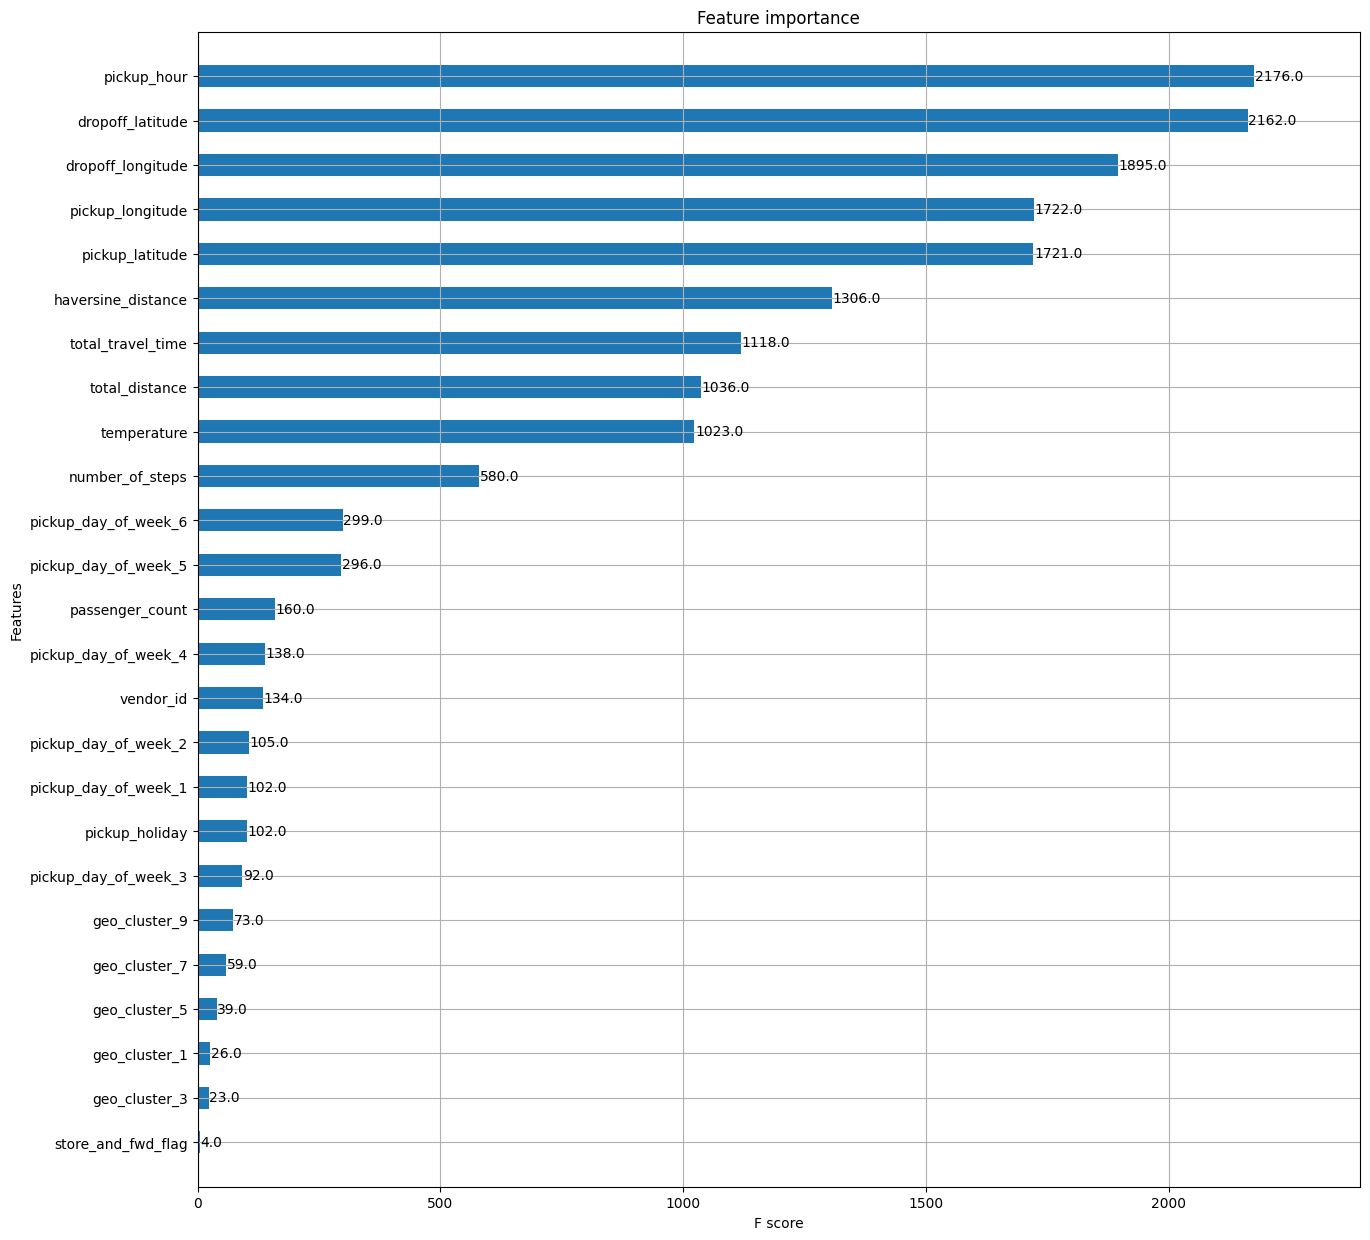

In [448]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

In [449]:
df = pd.read_csv('/Users/eduardgavrilov/Downloads/submission_gb.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1458644 non-null  object 
 1   trip_duration  1458644 non-null  float64
dtypes: float64(1), object(1)
memory usage: 22.3+ MB
